In [178]:
import numpy as np 
import os
import glob
import cv2
import glob
import itertools
import skimage.io as io
import skimage.transform as trans
import matplotlib.pyplot as plt
% matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from skimage.morphology import skeletonize
import math
from shapely.geometry import LineString
from shapely.geometry import Point

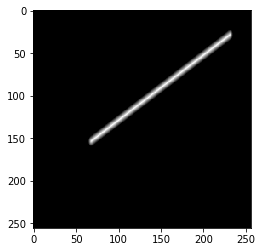

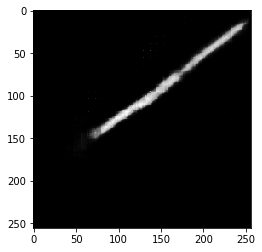

In [179]:
# Read the GT and Prediction
CurrentDirectory=os.getcwd()
CurrentDirectory = CurrentDirectory+'/PerformanceLinePrediction/'

GT=cv2.imread(CurrentDirectory+'GT/002mid.png',0)
GT=cv2.resize(GT,(256,256))
plt.figure()
plt.imshow(GT,cmap='gray')

PR=cv2.imread(CurrentDirectory+'Prediction/002_midline.png',0)
PR=cv2.resize(PR,(256,256))
plt.figure()
plt.imshow(PR,cmap='gray')


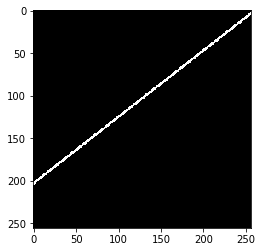

In [180]:
# Line Approximation using Hough line detection 
ret,GT=cv2.threshold(GT,20,255,cv2.THRESH_BINARY)
GT_Line=np.zeros_like(GT, dtype=np.uint8)
#-------------------------------------------------------------------------------------------------------------
L=1000
hough = cv2.HoughLines(PR,1,np.pi/180,50)

for rho1,theta1 in hough[0]:
#     print(theta1)
    a1 = np.cos(theta1)
    b1 = np.sin(theta1)
#     print(a1)
#     print(b1)
    x01 = a1*rho1
    y01 = b1*rho1
#     print(x01)
#     print(y01)
    xT1 = int(x01 + L*(-b1))
    yT1 = int(y01 + L*(a1))
    xT2 = int(x01 - L*(-b1))
    yT2 = int(y01 - L*(a1))
#     print(x11)
#     print(y11)
#     print(x21)
#     print(y21)
cv2.line(GT_Line,(xT1,yT1),(xT2,yT2),255,2)
plt.imshow(GT_Line,cmap='gray')

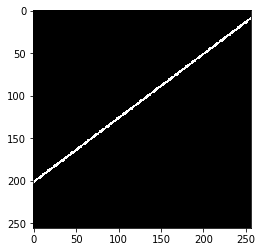

In [181]:
# Line Approximation using Hough line detection 
ret,PR=cv2.threshold(PR,20,255,cv2.THRESH_BINARY)
PR_Line=np.zeros_like(PR, dtype=np.uint8)
#-------------------------------------------------------------------------------------------------------------
L=1000
hough = cv2.HoughLines(PR,1,np.pi/180,50)

for rho1,theta1 in hough[0]:
#     print(theta1)
    a1 = np.cos(theta1)
    b1 = np.sin(theta1)
#     print(a1)
#     print(b1)
    x01 = a1*rho1
    y01 = b1*rho1
#     print(x01)
#     print(y01)
    xP1 = int(x01 + L*(-b1))
    yP1 = int(y01 + L*(a1))
    xP2 = int(x01 - L*(-b1))
    yP2 = int(y01 - L*(a1))
#     print(x11)
#     print(y11)
#     print(x21)
#     print(y21)
cv2.line(PR_Line,(xP1,yP1),(xP2,yP2),255,2)
plt.imshow(PR_Line,cmap='gray')

In [182]:
#Circle Approximation
Center=(128,128)
# radius=int(np.sqrt(128**2+128**2))

radius=500

print(Center)
print(radius)
plt.figure()
plt.Circle(Center, radius= radius)
plt.show()

(128, 128)
500


<Figure size 432x288 with 0 Axes>

In [183]:
pT = Point(128,228)
cT = pT.buffer(radius).boundary
lT = LineString([(xT1,yT1), (xT2, yT2)])
iT = cT.intersection(lT)

XT1=iT.geoms[0].coords[0]
print (XT1)

XT2=iT.geoms[1].coords[0]
print (XT2)

(-318.61370814336067, 451.74594350243405)
(453.3467412029928, -151.11840741567056)


In [184]:
pP = Point(128,228)
cP = pT.buffer(radius).boundary
lP = LineString([(xP1,yP1), (xP2, yP2)])
iP = cP.intersection(lP)

XP1=iP.geoms[0].coords[0]
print (XP1)

XP2=iP.geoms[1].coords[0]
print (XP2)

(-322.0910165654384, 444.39379256154285)
(459.9840874589614, -145.10266742677354)


In [185]:
def azimuth(point1, point2):
    '''azimuth between 2 shapely points (interval 0 - 360)'''
    angle = np.arctan2(point2.x - point1.x, point2.y - point1.y)
    return np.degrees(angle)if angle>0 else np.degrees(angle) + 360

In [186]:
P1 = Point(XT1)
P2 = Point(XP1)
interP = Point(128,228)

# print(azimuth(interP,P2))

# print(azimuth(P2,interP))

# print(azimuth(P1,P2))

# print(azimuth(P2,P1))

# print(azimuth(P1,P2))

# print(azimuth(P2,P1))

# result
print(azimuth(P1,interP)-azimuth(P2,interP))

# or
print(azimuth(interP,P1)-azimuth(interP,P2))
K=(azimuth(interP,P1)-azimuth(interP,P2))

0.9328809034022356
0.9328809034022356


In [187]:
P1 = Point(XT2)
P2 = Point(XP2)
interP = Point(128,228)

# print(azimuth(interP,P2))

# print(azimuth(P2,interP))

# print(azimuth(P1,P2))

# print(azimuth(P2,P1))

# print(azimuth(P1,P2))

# print(azimuth(P2,P1))

# result
print(azimuth(P1,interP)-azimuth(P2,interP))

# or
print(azimuth(interP,P1)-azimuth(interP,P2))
KK=(azimuth(interP,P1)-azimuth(interP,P2))

1.0273693109183455
1.0273693109183455


In [188]:
error=(K+KK)/2
error

0.9801251071602906